<a href="https://colab.research.google.com/github/himaanisrivatsava/Employee-Burnout-Rate-Analysis/blob/main/Employee_burn_out_rate_using_polynomial_featrues_%2CXGB%2Clgbm_(trials_for_the_most_accurate_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/employee_burnout_analysis-AI 2.xlsx')

In [ ]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
df.head

<bound method NDFrame.head of                     Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No            2                  3.0   
1                     Yes            1                  2.0   
2                     Yes            2                  NaN   
3                     Yes            1                  1.0   
4                      No            3                  7.0   
...                   ...          ...                  ...   
22745                  No            1                  3.0   
22746                 Yes            3                  6.0   
22747                 Yes            3                  7.0   
22748                  No            2                  5.0   
22749                  No            3                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]>

In [ ]:
df.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22740,fffe33003300380031003100,2008-09-05,Female,Product,No,3,6.0,7.3,0.55
22741,fffe31003600350034003800,2008-01-07,Male,Product,No,2,5.0,6.0,NaN
22742,fffe33003200310039003000,2008-07-28,Male,Product,No,3,5.0,8.1,0.69
22743,fffe3300390030003600,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
# Drop rows with any NaN values
df_cleaned = df.dropna()

In [ ]:
# Split features and target
X = df_cleaned.drop(columns=["Burn Rate", "Employee ID", "Date of Joining"])  # Drop irrelevant columns
y = df_cleaned["Burn Rate"]

In [ ]:
# Handle categorical variables using OneHotEncoder
categorical_columns = ["Gender", "Company Type", "WFH Setup Available"]
numerical_columns = [col for col in X.columns if col not in categorical_columns]

In [ ]:
# Define a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_columns),  # Leave numerical columns as they are
        ("cat", OneHotEncoder(drop="first"), categorical_columns),  # One-hot encode categorical columns
    ]
)

In [ ]:
# Create a pipeline to combine preprocessing and polynomial features
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
])

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the data
X_train_poly = pipeline.fit_transform(X_train)
X_test_poly = pipeline.transform(X_test)

In [ ]:
# Train Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train_poly, y_train)

GradientBoostingRegressor()

In [ ]:
# Predictions
y_pred = model.predict(X_test_poly)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.0028119343972932143
R2 Score: 0.9267816680950447


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=42)
xgb_model.fit(X_train_poly, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test_poly)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R2 Score: {r2_xgb}")

XGBoost Mean Squared Error: 0.0028431134936121095
XGBoost R2 Score: 0.9259698136559898


Mean Squared Error: 0.0027818349307350623
R2 Score: 0.9275654106797715


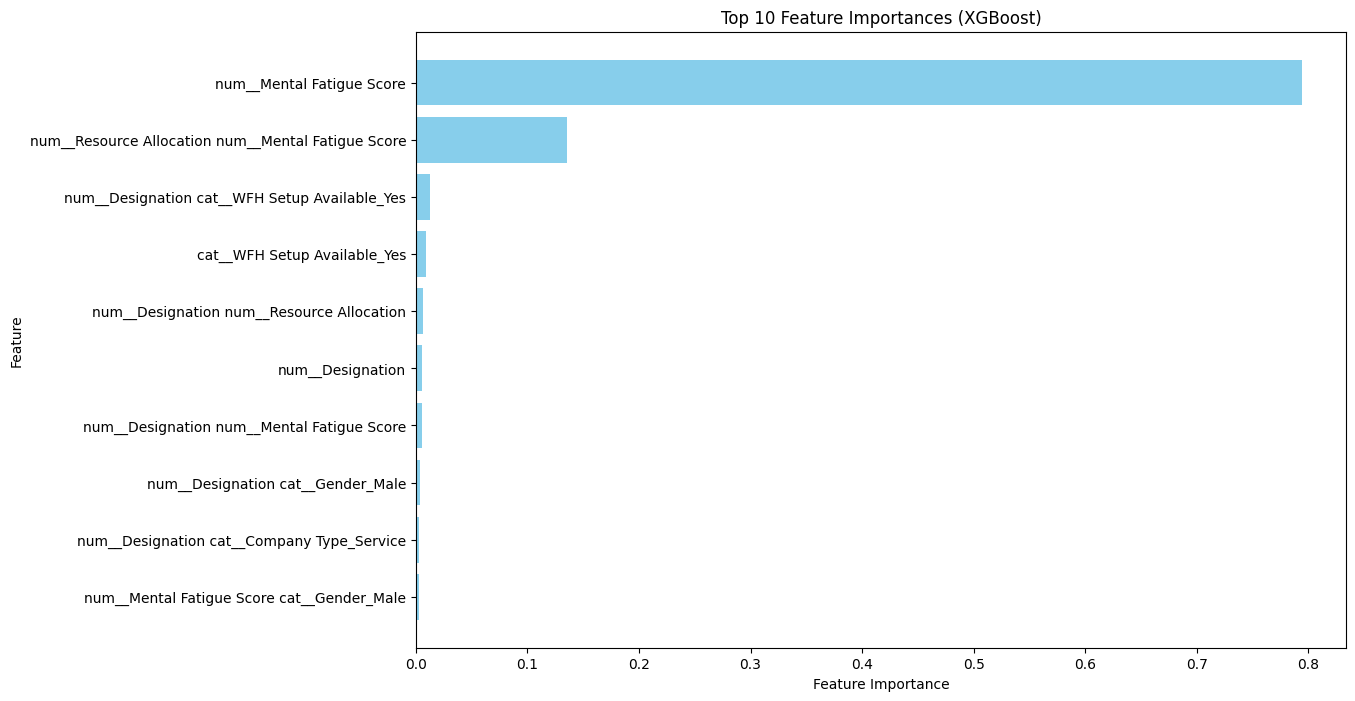

In [ ]:
# Split features and target
X = df_cleaned.drop(columns=["Burn Rate", "Employee ID", "Date of Joining"])  # Drop irrelevant columns
y = df_cleaned["Burn Rate"]

# Handle categorical variables using OneHotEncoder
categorical_columns = ["Gender", "Company Type", "WFH Setup Available"]
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Define a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_columns),  # Leave numerical columns as they are
        ("cat", OneHotEncoder(drop="first"), categorical_columns),  # One-hot encode categorical columns
    ]
)

# Create a pipeline for preprocessing
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing and polynomial features
X_train_poly = poly_features.fit_transform(preprocessor.fit_transform(X_train))
X_test_poly = poly_features.transform(preprocessor.transform(X_test))

# Train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42
)
xgb_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Feature Importance Visualization (Optional)
import matplotlib.pyplot as plt
import numpy as np

feature_importances = xgb_model.feature_importances_
feature_names = poly_features.get_feature_names_out(preprocessor.get_feature_names_out())

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(
    np.array(feature_names)[sorted_indices][:10],
    feature_importances[sorted_indices][:10],
    color="skyblue",
)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:13:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error: 0.06320602474448628
Root Mean Squared Error: 0.2514080840873783
R2 Score: 0.7400399938471003
Accuracy: 0.9367939752555137
Precision: 0.9386666666666666
Recall: 0.9078014184397163
F1 Score: 0.9229760734185513
ROC-AUC Score: 0.9844078444113791

Confusion Matrix:
[[2075   92]
 [ 143 1408]]


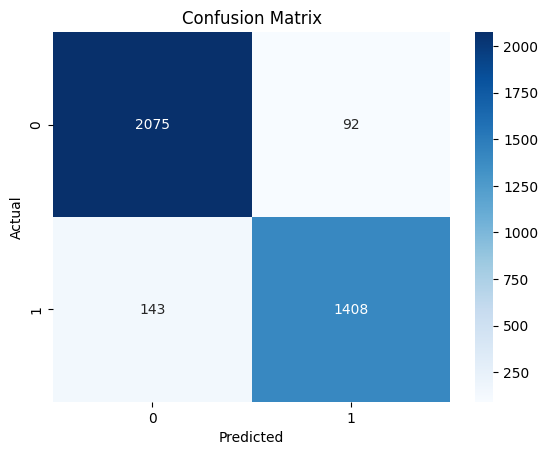

In [ ]:
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from xgboost import XGBClassifier

# Load the dataset
# df = pd.read_csv("your_dataset.csv")  # Replace with your dataset
df_cleaned = df.dropna()  # Drop rows with NaN values

# Split features and target
X = df_cleaned.drop(columns=["Burn Rate", "Employee ID", "Date of Joining"])
y = df_cleaned["Burn Rate"]

# Convert Burn Rate into binary classification (threshold: 0.5)
y_binary = (y >= 0.5).astype(int)

# Handle categorical variables using OneHotEncoder
categorical_columns = ["Gender", "Company Type", "WFH Setup Available"]
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Define a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_columns),
        ("cat", OneHotEncoder(drop="first"), categorical_columns),
    ]
)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Split the data into training and test sets
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# Apply preprocessing and polynomial features
X_train_poly = poly_features.fit_transform(preprocessor.fit_transform(X_train))
X_test_poly = poly_features.transform(preprocessor.transform(X_test))

# Define and train XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
)
xgb_model.fit(X_train_poly, y_train_binary)

# Make predictions
y_pred_binary = xgb_model.predict(X_test_poly)
y_pred_proba = xgb_model.predict_proba(X_test_poly)[:, 1]

# Evaluate metrics
mse = mean_squared_error(y_test_binary, y_pred_binary)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)

# Optional: Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Drop NaN values
df.dropna(inplace=True)

# Splitting Features and Target
X = df.drop(columns=["Burn Rate", "Employee ID", "Date of Joining"])
y = (df["Burn Rate"] > 0.5).astype(int)  # Convert to binary for classification

# Preprocessing
numeric_features = ["Designation", "Resource Allocation", "Mental Fatigue Score"]
categorical_features = ["Gender", "Company Type", "WFH Setup Available"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(drop="first"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Transform Data
X_train_poly = poly.fit_transform(preprocessor.fit_transform(X_train))
X_test_poly = poly.transform(preprocessor.transform(X_test))

# Model Training with LightGBM
lgbm_model = LGBMClassifier(random_state=42)

# Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 50],
}

# Grid Search
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train_poly, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predictions
y_pred_binary = best_model.predict(X_test_poly)
y_pred_proba = best_model.predict_proba(X_test_poly)[:, 1]

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_binary)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print Results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
